# Kisima, Analysis and Model for Predicting Tanzanian Waterwells Functionality

A model and analysis by Karim Oliver, Johnhoy Stephens, and Luluva Lakdawala

## Setting the Scene:

This project, Kisima, investigates the factors that determine the functionality of waterwells in the variuos regions of Tanzania. Our model and investigations are directed towards The Tanzanian Ministry of Water, Taarifa and other stakeholders intersted in the functionality of waterwells in Tanzania. Many features contribute to the functionality of the waterwells, we aim to discover some of them and build a model that uses these features and correctly predicts the status of these wells. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania. 

### Goals:

Our project aims to:
- Build a model that predicts the status of the waterwells with a focus on correctly identifying the non-functional wells
- Investigate some of the features that appear to have a relationship with the status of the waterwells
- Validate the following claims made during our investigation with the features:
    - Quantity of water available to the wells determines their status
    - The Extraction type used to pull water from the wells has a bearing on the functionality of the wells
    - The waterpoint type has an influence on the status of the wells
    - Do the kind of pump that is operating with the wells, the year of installation or how it is managed has any relation with the functionality of the wells. 
    

### Definitions:

- Class:
    - Class is defined as the status of the waterwells in our dataset.
        - Class 0 relates to Functional - the waterpoints that are operational and there are no repairs needed
        - Class 1 realates to Functional but Needs Repair - the waterpoints that are operational but need repairs
        - Class 2 relates to Nonfunctional - the waterpoints that are not operational
- Features:
    - Features refer to the independent variables in each record in the dataset we are using to build our model on
- Model:
    - The term model referred to through this project is in reference to the classification model we build to predict the status of the waterwells
- Recall score:
    - The metric we are using to compare the various models we build. It is defined as the percent of correct results over the number of results that should have been returned. We chose to calculate the recll score for Class 2 (Nonfunctional wells)

### Data:

The data used in this project is from the DrivenData website and can be found [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/). From this link, you will need to sign up for DrivenData to have access to these files
- Training set values
- Training set labels


Additional information about the features in the dataset can be found [here](../../references/data_dictionary_waterpoints.pdf).

Note that this modeling analysis contains the 'stream lined' version iterations from getting our first simple model to our final model. To get a more in depth view of our exploration process, mistakes, and triumphs, please refer to [Luluva's](../../notebooks/ll_notebooks), [Johnhoy's](../../notebooks/js_notebooks) and [Karim's](../../notebooks/ko_notebooks) notebooks.

### Analysis Takeaways:  

- Our final model, Random Forest Classifier is able to achieve a Recall score for Class 2 of about 77% and an overall Accuracy of about 80%
- Our analysis finds that geographical aspects - longitude and latitude of the waterwells are the most significant features that helped classify the waterwells
- We find that the population around the waterwells and the year in which the wells were constructed are among the important features for our model to classify the records
- Water quantity is the most significant categorical feature with 'dry', 'enough', and 'insufficient' being the specific encoded categories that determined the classification of the waterwells
- We find that extraction type is also an important categorical feature for determining the classes. Within which 'other', 'gravity', and 'hand pump' are the top classifiers.
- We also find waterpoint type - communal standpipe as being one of the top important feature in our final model.

### Future Investigations:

- Could we build another model that would focus on predicting the Class 1 waterwells, the ones that need repair?
- Which features directly affect the functional wells that need repair?

### Recommendations:

- Regular inspection of high risk areas can be undertaken to avoid having more number of nonfunctional waterwells
- Wells that work on motorpump or wind powered energy are found to be more susceptible to being nonfunctional. Maintenance procedures can be set in place to ensure that they remain functional. 

# Data Cleaning and Exploratory Data Analysis:

In [1]:
%load_ext autoreload
%autoreload 2

## Get data:

Firstly, to get the data downloaded, we'll have to go to the DrivenData website [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/). It requires us to sign up before we can have access to these files
- Training set values
- Training set labels

Once we get to the datadownload page, we need to download the two csv files locally and move them to the `data` folder in the root directory. Then, 
- `Training set values` file needs to be renamed to -> `training_set_values.csv` 
- `Training set labels` file needs to be renamed to -> `training_set_labels.csv`


### Imports

In [2]:
#import
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, recall_score, make_scorer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
#import customized functions
from src.data_cleaning import cleaning_functions as cfs
from src.data_cleaning import exploration_functions as efs
from src.data_cleaning import processing_functions as pfs
from src.data_cleaning import modeling_functions as mfs

**Note**: Through out this project, everytime we had to set a random_state, we chose 2020

All members of the group explored and cleaned the data to each get a deeper understanding of the dataset.  The following shows 'stream-lined' example of the cleaning process to get an idea of how we initially tackled the data in the two csv files.  When it came to start building models, we voted on which features we would retain, the feature engineering we would perform to use the features we agreed upon and how we would transform and encode the categorical features we had in our dataset.  Execute the cells as shown here to get an idea of our data exploration.

We use our custom function here to read in our files. It uses pandas to read the csv files and convert them into dataframes.

We then split the dataframes into training and testing sets setting the random_state at 2020
We do this right away so as to not learn anything from the designated test sets and let our exploration and models only learn from the training sets.

We then combine the X_train and y_train into one dataframe and in the end, return the X_train, X_test, y_train, y_test and the merged dataframe


In [3]:
X_train, X_test, y_train, y_test, df = cfs.load_data_files()

## Inspect the data:

In [4]:
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,41434,functional,0.0,2011-07-18,P,0,P,33.037555,-2.411289,Kwa Lutenganija Buluba,...,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
1,47577,functional,1200.0,2013-01-21,Government Of Tanzania,1228,DWE,30.254171,-4.530045,Kwa Fulugence,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
2,55982,functional,0.0,2012-10-07,Tasaf,0,DWE,31.515446,-3.335620,Kanyemba,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,25879,non functional,0.0,2013-02-20,World Vision,954,World vision,36.838153,-3.650579,Shuleni,...,unknown,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,other,other
4,13900,functional,0.0,2011-07-27,NaN,0,NaN,33.540494,-9.162976,Kwa Andreas,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


We noticed right away that we were dealing with many categorical features and to get an idea of what these features really were we looked up the data dictionary found [here](../../references/data_dictionary_waterpoints.pdf)

In [5]:
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

We then checked for `Nans` and found them to be present in categorical features alone. We brainstormed different ideas on how to fill them and decideded to replace the Nans as `'unknown'` so that we could retain the record and use the information from its other features.

In [6]:
df.shape

(44550, 41)

In [7]:
cfs.check_for_nans(df)

,nan_count
funder,2680
installer,2702
subvillage,288
public_meeting,2537
scheme_management,2954
scheme_name,21181
permit,2275


We unanimously agreed to drop `scheme_name` from our dataframe as it had **21132** Nans and we did not really want to use scheme names to decide if a waterpoint was functional or not

In [8]:
df.drop(['scheme_name'], axis=1, inplace=True)

Next we replace all our `Nans` as `unknown`

In [9]:
cfs.fill_all_nans(df)

Inspect if we have any remaining `Nans`

In [10]:
df.isna().sum().sum()

0

Before going further with data exploration, let's convert our `status_group` to `target` and label encode them so as to be able to visualize some of our features.

In [11]:
classes_dict, df = cfs.create_target(df)

In [12]:
classes_dict

{0: 'functional', 1: 'functional needs repair', 2: 'non functional'}

##### 0 : Functional
##### 1 : Functional needs Repair
##### 2 : Non Functional

We then dropped these columns that we deemed to be unnecessary for our classification model `id` `date_recorded` `recorded_by` `wpt_name` `num_private`

In [13]:
df.drop(['id', 'date_recorded', 'recorded_by', 'wpt_name', 'num_private'], axis=1, inplace=True )

#### EDA of Categorical Features

We noticed many similar/duplicate columns relating to similar information about each waterpoint. We explored each of these groups inidividually and tried to gauge which of those columns had the strongest relation with the target. We were then able to reduce a few more columns and had the data set be a bit more managable.

The groups discovered were:
* Region specific: `subvillage`, `basin`, `region`, `region_code`, `district_code`, `lga`, `ward`
* Extraction specific: `extraction_type`, `extraction_type_group`, `extraction_type_class`
* Management specific: `management`, `management_group`
* Payment specific: `payment`, `payment_type`
* Water quality: `water_quality`, `quality_group`
* Water quantity: `quantity`, `quantity_group`
* Source: `source`, `source_type`, `source_class`
* Waterpoint type: `waterpoint_type`, `waterpoint_type_group`


We then did some EDA to see if we noticed any trends relating to the various features and our target.
Importing some of the ones that stood out for us.

![Extraction_Type](../../reports/figures/Wells&Extractiontype.png)

We noticed `other` stood out from the lot and it related more closely with nonfunctional wells, whereas `gravity`, `handpump` and `rope pump` indicated that they could be good classifiers for functional wells. If ensemble methods was going to be our end game for modeling puposes, these could help with the classificatoin due to the information gain from these variables.

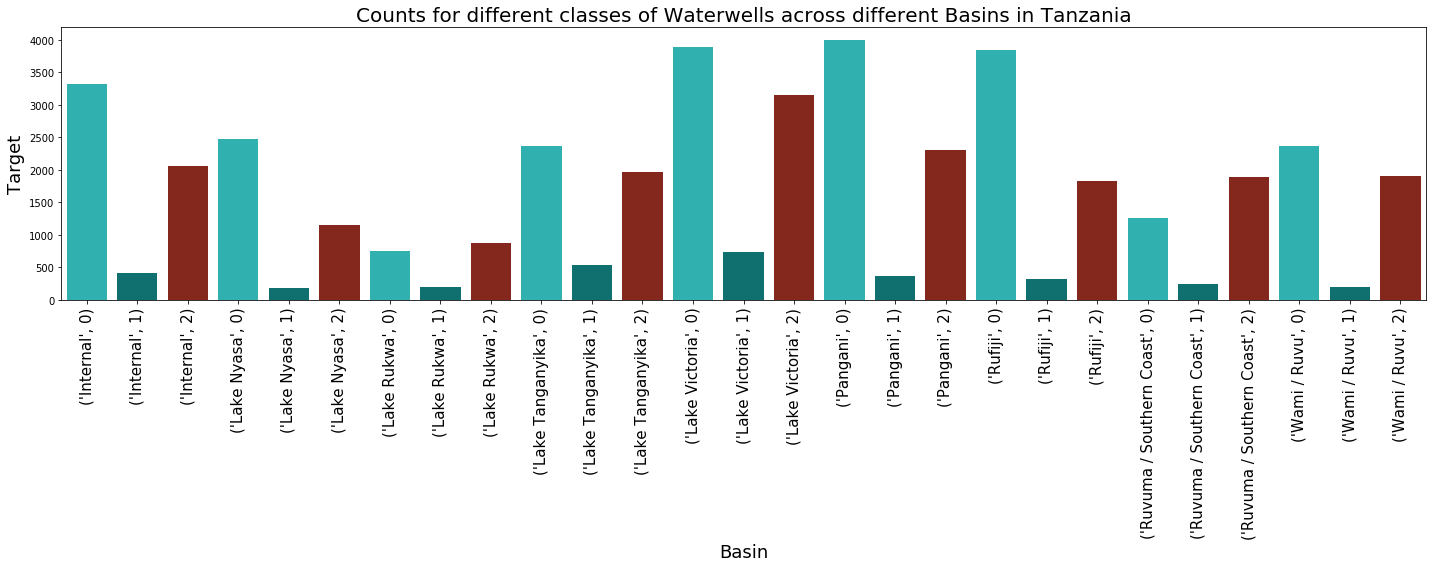

In [14]:
efs.plot_basin_counts(df)

Amongst the variuos `basin`s we found `Lake Rukwa` and `Ruvuma` to have more count of nonfunctional wells. We had to retain this feature as it could be a helpful classifier.

We dug around more and found many intersting features out of which the most significant we thought was the `water quantity` feature.

![Wells&waterquantity](../../reports/figures/Wells&waterquanity.png)

We found this really interesting as we knew this `dry` sub-feature was going to be a good clasifier for us just based on the proportion of wells that were nonfunctional in this sub categorizaton. 

We then narrowed down our categorical features and decided to drop the following from our end feature list:
>`subvillage`, `ward`, `extraction_type_class`, `extraction_type_class`, `management_group`, `payment_type`, `quality_group`, `quantity_group`, `source_type`, `source_class`, `waterpoint_type_group`, `installer`, `funder`

#### EDA for Numeric Features

We then shifted our focus towards the few numeric features we had in our dataset

In [15]:
numeric_features = [i for i,name in zip(df.dtypes.index, df.dtypes) if name in ['int64', 'float64']]
numeric_df = df[numeric_features]
numeric_df = numeric_df.drop(['region_code', 'district_code'], axis=1)

Investigating their values

In [16]:
numeric_df.head(7)

,target,amount_tsh,gps_height,longitude,latitude,population,construction_year
0,0,0.0,0,33.037555,-2.411289,0,0
1,0,1200.0,1228,30.254171,-4.530045,650,2002
2,0,0.0,0,31.515446,-3.335620,0,0
3,2,0.0,954,36.838153,-3.650579,200,2003
4,0,0.0,0,33.540494,-9.162976,0,0
5,2,0.0,0,33.906286,-9.422596,0,0
6,2,0.0,934,37.668473,-3.318240,1,1980


In [17]:
numeric_df.describe()

,target,amount_tsh,gps_height,longitude,latitude,population,construction_year
count,44550.000000,44550.000000,44550.00000,44550.000000,4.455000e+04,44550.000000,44550.000000
mean,0.840337,311.803606,667.13486,34.063738,-5.701952e+00,178.796611,1295.855847
std,0.950518,2896.833721,693.26855,6.585153,2.951913e+00,462.652249,953.097530
min,0.000000,0.000000,-63.00000,0.000000,-1.164838e+01,0.000000,0.000000
25%,0.000000,0.000000,0.00000,33.084442,-8.548090e+00,0.000000,0.000000
50%,0.000000,0.000000,367.00000,34.894399,-5.018285e+00,25.000000,1985.000000
75%,2.000000,20.000000,1320.00000,37.171972,-3.323613e+00,210.000000,2004.000000
max,2.000000,350000.000000,2770.00000,40.325240,-2.000000e-08,15300.000000,2013.000000


- `amount_tsh`  had 70% 0 values, and one that was as high as 350000, we collectively decided to drop this column.
- `construction_year` had 15,638 records with 0 as their year, which we decided to impute with the median of the remaining actual construction year values.
- for `gps_height`, `longitude`, `latitude`, `population` there were quite a few 0 values that did no show up as Nans, we decided to get creative here and use their "nearest neighbors" and take their respective means for these inidivdual columns and use that to fill the gaps. Here's how we went about it:
  - First we converted the `0`s and `1`s to nans
  - For each of our interested columns ->`gps_height`, `longitude`, `latitude`, `population`  we used pandas groupby function with each of these columns individually (in this order of importance)->`subvillage`, `district_code`, `basin`  and found means for our interested columns. We then replaced the nans we created above with these grouped means for each interested column. 
- for `gps_height` we decided to bin them further into 6 bins 

#### Investigated class distribution

In [18]:
df.target.value_counts(normalize=True)

0    0.544310
2    0.384646
1    0.071044
Name: target, dtype: float64

##### Found Class Imbalance 
only **7% of data** relates to **class 1** (waterpoints that are functional and need repair)

We knew at this point we were in for some SMOTE or other oversampling technique to tackle the imbalance in our dataset.

At this point we had cleaned up our dataset and had tackled all nulls and unnecessary zeroes

### Model Scoping

We were now ready to try out a few models and in the process discover our "best model"

#### Metric for comparison
 `Recall score` was unanimously chosen to be our metric for comparing models, we wanted to build a model that identified the Nonfunctional wells. Wrongly labeling the nonfunctional wells as functional was a concern to us. Since that would mean that those wells would not be investigated or maintained by the concerned authorities. 
 
 **metric = Recall Score for Class 2**    (correctly identified nonfunctional wells/all nonfunctional wells)

#### Importing the dataset for Modeling

Here the dataset is cleaned as described earlier, along with encoding all the categorical features using OneHotEncoder from sklearn. The encoders derived from processing the training sets were also used to transform the test sets. The detailed docstrings nad codes for individual steps can be found [here](../../src/data_cleaning/processing_functions.py)

In [19]:
X_train, X_test, y_train, y_test, classes_dict = pfs.processed_dataset()
X_train, X_test = pfs.ohe_train_and_test_features(X_train, X_test)

#### First Simple Model

Just to get an idea of what we were playing with we decided to try out a decision tree for our first simple model

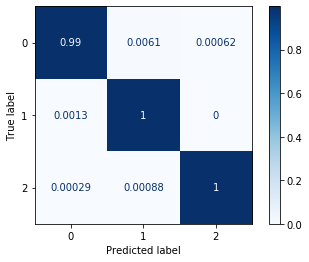

In [20]:
#instantiating a decision tree with class_weights being balanced
dt = DecisionTreeClassifier(random_state=2020, class_weight='balanced')
model1 = dt.fit(X_train, y_train)
plot_confusion_matrix(model1, X_train, y_train, cmap='Blues', normalize='true');

Well we found our simple model to fit perfectly on our training set. But our goal was to be able to build a model that could be generalized on 'new data'. Our simple model would definitely lead to a high variance on unseen data. We needed to start using cross validation so we could get a better idea about how our model would perform on 'other data'.


### Our modeling game plan was as follows:
- First create a scorer to compute recall for class 2 alone which can then be used in croos_val_score()
- Create a `smoted dataset` to tackle class imbalance
- Alternate between smoted and un-smoted dataset, when un-smoted dataset is used, ensure the class_weight is set to balanced
- the model that has low variance between the validation folds and has the maximum recall score would be our final model.

We tried out all the ensemble methods we could from `sklearn`. For detailed explanations about our trials and failures please refer the notebooks [here](../ll_notebooks) and [here](../js_notebooks)

#### Smoted Model

In the cell below we use Synthetic Minority Oversampling TEchnique (**SMOTE**) from imblearn.over_sampling and create a new training dataset that can be used with balanced distribution of classes.

In [21]:
X_train_smoted, y_train_smoted = SMOTE(random_state=2020).fit_sample(X_train.values, y_train)

Let's also bring in our custom scorer that calculates the Recall score for our specific class (2: Nonfunctional wells)

We do that in the cell below

In [22]:
scorer = mfs.scorer()

For illustration on how we used the smote technique, we'll run the vanilla RandomForestClassifier on smoted dataset, using cross validation with 3 folds in the cell below

In [23]:
rf2 = RandomForestClassifier(random_state=2020)
rf2.fit(X_train_smoted, y_train_smoted)
print('Class 2 recall score :','\n',cross_val_score(rf2, X_train_smoted, y_train_smoted, scoring=scorer, cv=3))

Class 2 recall score : 
 [0.77458864 0.76196957 0.60942719]


We find that this model is not performing too bad, the variance is seen in just one of the three folds, but the overall bias we noticed was comparatively low (from our other not so good models). 

We tried out both smoted and unsmoted datasets in our iterations and found a pattern, there was more variance between the folds when we used smoted dataset and less variance when we used our regular training dataset (with class_weight = 'balanced' option)

#### Final Model

So we decided to stick with our original training data and chose to run a **mini grid search** with these 18 combinations:
- `n_estimators`: [50, 100, 150]
    
- `max_features`: ['sqrt', 'log2', 1]
    
- `criterion`: ["gini", "entropy"]

Our best_params were: 
* **'criterion': `'entropy'`,**  
* **'max_features': `'log2'`,**  
* **'n_estimators': `150`**

We then continued with a few more iterations , knowing that our grid search was limited to the values we chose, and found these to be our best estimators:

> **RandomForestClassifier(class_weight=`'balanced'`, 
                           criterion=`'entropy'`,
                           max_features=`'log2'`,
                           n_estimators=`200`,
                          random_state=2020)**

Here's how our final model shaped up

In [24]:
final_model = RandomForestClassifier(class_weight='balanced', criterion='entropy', 
                             max_features='log2', n_estimators=200,
                             random_state=2020)
final_model.fit(X_train, y_train)
print('Class 2 recall score :','\n',cross_val_score(final_model, X_train, y_train, scoring=scorer, cv=3))

Class 2 recall score : 
 [0.76628151 0.76663165 0.7710084 ]


We were thrilled to see out metric performing well with low variance between the folds

**It was finally time to test it out on our test set**

In [25]:
recall_score(y_test, final_model.predict(X_test), average=None)[2]

0.7663502109704642

This brought happy tears to our eyes! we were sticking with this model. Let's now print out some details regarding other scores and features that were relevant for branching out at the nodes of the 200 estimators we used. 

## Model interpretation

![Our model](../../reports/figures/bestmodelplot.png)

In [26]:
print(classification_report(y_test, final_model.predict(X_test),
                            target_names=['Functional',
                                          'Functional, Needs Repair',
                                          'Nonfunctional']))

                          precision    recall  f1-score   support

              Functional       0.79      0.89      0.84      8010
Functional, Needs Repair       0.58      0.31      0.41      1152
           Nonfunctional       0.83      0.77      0.80      5688

                accuracy                           0.80     14850
               macro avg       0.73      0.65      0.68     14850
            weighted avg       0.79      0.80      0.79     14850



- Our model succesfully predicted 77% of 'truly' Nonfunctional wells from our test set.
- Our model had an overall accuracy of 80% for the test set data
- Our model's precision score for Nonfunctional wells is also pretty high at around 83%
- Our model fails to correctly predict Class 1 with a very low recall of about 31% for this class (wells needing repair)

Printing out list of important features in our model

In [27]:
sorted(list(zip(X_train.columns, final_model.feature_importances_)), key=lambda x: x[1], reverse=True)[:20]

[('longitude', 0.14760880319320208),
 ('latitude', 0.14454789280256236),
 ('population', 0.07143115844398291),
 ('construction_year', 0.05409489090510416),
 ('dry', 0.03911514193181044),
 ('enough', 0.022364423749381544),
 ('insufficient', 0.015017471613087002),
 ('other', 0.014927762952718148),
 ('other', 0.013775772574932022),
 ('never pay', 0.013721293969689423),
 ('gravity', 0.011379367755001613),
 ('communal standpipe', 0.011090102838493727),
 ('above surface up to 1250', 0.009398245412234656),
 ('pay monthly', 0.008880822969308212),
 ('above surface upto 1750', 0.008758911289176927),
 ('True', 0.008078525606993332),
 ('hand pump', 0.008029875051156661),
 ('soft', 0.007737218709698372),
 ('spring', 0.007615047462805865),
 ('VWC', 0.007578655764626777)]

The features we saw in our EDA and thought would have a bearing in our classification model do infact show up in the list above! 

## Conclusion:

- Our analysis finds that geographical aspects - longitude and latitude of the waterwells are the most significant features that helped classify the waterwells
- We find that the population around the waterwells and the year in which the wells were constructed are among the important features for our model to classify the records
- Water quantity is the most significant categorical feature with 'dry', 'enough', and 'insufficient' being the specific encoded categories that determined the classification of the waterwells
- We find that extraction type is also an important categorical feature for determining the classes. Within which 'other', 'gravity', and 'hand pump' are the top classifiers.
- We also find waterpoint type - communal standpipe as being one of the top important feature in our model.

### Future Investigations:

- Could we build another model that would focus on predicting the Class 1 waterwells, the ones that need repair?
- Which features directly affect the functional wells that need repair?

### Recommendations:

- Regular inspection of high risk areas can be undertaken to avoid having more number of nonfunctional waterwells
- Wells that work on motorpump or wind powered energy are found to be more susceptible to being nonfunctional. Maintenance procedures can be set in place to ensure that they remain functional. 